# Deep Learning


Objective of this notebook is to check whether the CNN model can be applied on multivariate tabular dataset or not. If yes then improve the performance of the model by setting proper values for hyperparameters and network architecture.
For this purpose, I have taken s&p500 data to predict whether Consumer Price Index will increase or decrease based on the other economic indicators such as __SP500, Dividend, Earnings, Long Interest Rate, Real Price, Real Dividend,  Real Earnings__. 



__Multivariate CNN Models:__
Although traditionally developed for two-dimensional image data, CNNs can be used to model Multivariate time series forecasting problems.

Multivariate time series data means data where there is more than one observation for each time step with a temporal ordering and a model is required to learn from the series of past observations to predict the next value in the sequence.

This section is divided into two parts; they are:

> __A.Data Preparation<br>
> B.CNN Model__<br>

__Data Source: https://datahub.io/core/s-and-p-500__

## A. Data Preparation

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp = pd.read_csv('data_csv.csv')

In [3]:
sp.isnull().values.any()

True

In [4]:
sp.isnull().sum()

Date                      0
SP500                     0
Dividend                  1
Earnings                  4
Consumer Price Index      0
Long Interest Rate        0
Real Price                0
Real Dividend             1
Real Earnings             4
PE10                    120
dtype: int64

In [5]:
sp[sp.isnull().values.any(axis=1)].head()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1871-01-01,4.44,0.26,0.4,12.46,5.32,89.00,5.21,8.02,NaN
1,1871-02-01,4.50,0.26,0.4,12.84,5.32,87.53,5.06,7.78,NaN
2,1871-03-01,4.61,0.26,0.4,13.03,5.33,88.36,4.98,7.67,NaN
3,1871-04-01,4.74,0.26,0.4,12.56,5.33,94.29,5.17,7.96,NaN
4,1871-05-01,4.86,0.26,0.4,12.27,5.33,98.93,5.29,8.14,NaN


In [6]:
## Droping the column
sp = sp.drop('PE10', axis=1)
## fillna with forward fill
sp=sp.fillna(method='ffill', axis=1)
sp.tail()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings
1763,2017-12-01,2664.34,48.93,109.88,246.52,2.4,2700.13,49.59,111.36
1764,2018-01-01,2789.8,49.29,49.29,247.87,2.58,2811.96,49.68,49.68
1765,2018-02-01,2705.16,49.64,49.64,248.99,2.86,2714.34,49.81,49.81
1766,2018-03-01,2702.77,50,50,249.55,2.84,2705.82,50.06,50.06
1767,2018-04-01,2642.19,2642.19,2642.19,249.84,2.8,2642.19,2642.19,2642.19


In [7]:
sp.isnull().sum()

Date                    0
SP500                   0
Dividend                0
Earnings                0
Consumer Price Index    0
Long Interest Rate      0
Real Price              0
Real Dividend           0
Real Earnings           0
dtype: int64

In [10]:
## Use the below code to create a new variable so as to detect increament or decrement of CPI 

cnt=1
target=[]
for i in sp['Consumer Price Index']:
    if sp['Consumer Price Index'][cnt] > i:
        print(sp['Consumer Price Index'][cnt], '>' , i , '1')
        target.append(1)
    else:
        print(sp['Consumer Price Index'][cnt], '<' , i , '0')
        target.append(0)
    cnt+=1


12.84 > 12.46 1
13.03 > 12.84 1
12.56 < 13.03 0
12.27 < 12.56 0
12.08 < 12.27 0
12.08 < 12.08 0
11.89 < 12.08 0
12.18 > 11.89 1
12.37 > 12.18 1
12.37 < 12.37 0
12.65 > 12.37 1
12.65 < 12.65 0
12.65 < 12.65 0
12.84 > 12.65 1
13.13 > 12.84 1
13.13 < 13.13 0
13.03 < 13.13 0
12.84 < 13.03 0
12.94 > 12.84 1
13.03 > 12.94 1
12.75 < 13.03 0
13.13 > 12.75 1
12.94 < 13.13 0
12.94 < 12.94 0
13.23 > 12.94 1
13.23 < 13.23 0
13.23 < 13.23 0
12.94 < 13.23 0
12.56 < 12.94 0
12.56 < 12.56 0
12.56 < 12.56 0
12.56 < 12.56 0
12.27 < 12.56 0
11.89 < 12.27 0
12.18 > 11.89 1
12.37 > 12.18 1
12.37 < 12.37 0
12.37 < 12.37 0
12.18 < 12.37 0
12.08 < 12.18 0
11.8 < 12.08 0
11.89 > 11.8 1
11.8 < 11.89 0
11.8 < 11.8 0
11.61 < 11.8 0
11.51 < 11.61 0
11.51 < 11.51 0
11.51 < 11.51 0
11.51 < 11.51 0
11.51 < 11.51 0
11.61 > 11.51 1
11.32 < 11.61 0
11.13 < 11.32 0
11.13 < 11.13 0
11.23 > 11.13 1
11.13 < 11.23 0
11.13 < 11.13 0
11.04 < 11.13 0
10.94 < 11.04 0
10.85 < 10.94 0
10.85 < 10.85 0
10.85 < 10.85 0
10.75 < 10.85 

24.5 < 24.5 0
24.4 < 24.5 0
24.2 < 24.4 0
24.1 < 24.2 0
24.0 < 24.1 0
23.8 < 24.0 0
23.8 < 23.8 0
23.9 > 23.8 1
23.8 < 23.9 0
23.9 > 23.8 1
23.7 < 23.9 0
23.8 > 23.7 1
23.9 > 23.8 1
23.7 < 23.9 0
23.8 > 23.7 1
23.6 < 23.8 0
23.5 < 23.6 0
23.5 < 23.5 0
23.6 > 23.5 1
23.6 < 23.6 0
23.7 > 23.6 1
23.8 > 23.7 1
24.1 > 23.8 1
24.3 > 24.1 1
24.4 > 24.3 1
24.6 > 24.4 1
24.7 > 24.6 1
25.0 > 24.7 1
25.4 > 25.0 1
25.7 > 25.4 1
25.8 > 25.7 1
25.8 < 25.8 0
25.9 > 25.8 1
25.9 < 25.9 0
25.9 < 25.9 0
25.9 < 25.9 0
26.1 > 25.9 1
26.2 > 26.1 1
26.4 > 26.2 1
26.5 > 26.4 1
26.5 < 26.5 0
26.3 < 26.5 0
26.3 < 26.3 0
26.4 > 26.3 1
26.4 < 26.4 0
26.5 > 26.4 1
26.7 > 26.5 1
26.7 < 26.7 0
26.7 < 26.7 0
26.7 < 26.7 0
26.7 < 26.7 0
26.7 < 26.7 0
26.6 < 26.7 0
26.5 < 26.6 0
26.6 > 26.5 1
26.6 < 26.6 0
26.7 > 26.6 1
26.8 > 26.7 1
26.8 < 26.8 0
26.9 > 26.8 1
26.9 < 26.9 0
27.0 > 26.9 1
26.9 < 27.0 0
26.9 < 26.9 0
26.9 < 26.9 0
26.9 < 26.9 0
26.9 < 26.9 0
26.8 < 26.9 0
26.9 > 26.8 1
26.9 < 26.9 0
26.9 < 26.9 0
26.9 <

210.23 < 212.43 0
211.14 > 210.23 1
212.19 > 211.14 1
212.71 > 212.19 1
213.24 > 212.71 1
213.86 > 213.24 1
215.69 > 213.86 1
215.35 < 215.69 0
215.83 > 215.35 1
215.97 > 215.83 1
216.18 > 215.97 1
216.33 > 216.18 1
215.95 < 216.33 0
216.69 > 215.95 1
216.74 > 216.69 1
217.63 > 216.74 1
218.01 > 217.63 1
218.18 > 218.01 1
217.97 < 218.18 0
218.01 > 217.97 1
218.31 > 218.01 1
218.44 > 218.31 1
218.71 > 218.44 1
218.8 > 218.71 1
219.18 > 218.8 1
220.22 > 219.18 1
221.31 > 220.22 1
223.47 > 221.31 1
224.91 > 223.47 1
225.96 > 224.91 1
225.72 < 225.96 0
225.92 > 225.72 1
226.54 > 225.92 1
226.89 > 226.54 1
226.42 < 226.89 0
226.23 < 226.42 0
225.67 < 226.23 0
226.66 > 225.67 1
227.66 > 226.66 1
229.39 > 227.66 1
230.09 > 229.39 1
229.81 < 230.09 0
229.48 < 229.81 0
229.1 < 229.48 0
230.38 > 229.1 1
231.41 > 230.38 1
231.32 < 231.41 0
230.22 < 231.32 0
229.6 < 230.22 0
230.28 > 229.6 1
232.17 > 230.28 1
232.77 > 232.17 1
232.53 < 232.77 0
232.94 > 232.53 1
233.5 > 232.94 1
233.6 > 233.5 1
2

KeyError: 1768

In [11]:
target=pd.DataFrame(data=target, columns=['CPI_Inc'],dtype=int)
sp=sp[:1767]

In [12]:
frames=[sp,target]
sp=pd.concat(frames, axis=1, join='outer')
sp.tail()

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,CPI_Inc
1762,2017-11-01,2593.61,48.68,108.95,246.67,2.35,2626.9,49.3,110.35,0
1763,2017-12-01,2664.34,48.93,109.88,246.52,2.4,2700.13,49.59,111.36,1
1764,2018-01-01,2789.8,49.29,49.29,247.87,2.58,2811.96,49.68,49.68,1
1765,2018-02-01,2705.16,49.64,49.64,248.99,2.86,2714.34,49.81,49.81,1
1766,2018-03-01,2702.77,50,50,249.55,2.84,2705.82,50.06,50.06,1


In [13]:
sp3=sp.drop('Date',axis=1)

test=sp3[-40:]
train=sp3[:-40]
#Train
sp1=np.array(train)
#Test
sp2=np.array(test)

In [14]:
### To change the dimension of the data for deep learning model

from numpy import array

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [15]:
# choose a number of time steps
n_steps = 8

# convert into input/output
X1, y1 = split_sequences(sp1, n_steps)
# convert into input/output
X2, y2 = split_sequences(sp2, n_steps)

print(X1.shape, y1.shape)
print(X2.shape, y2.shape)


n_features = X2.shape[2]
n_features

(1720, 8, 8) (1720,)
(33, 8, 8) (33,)


8

# B. CNN Model:

# Part A - Deep Learning model

___Hyperparameters:___<br>
filters=128<br>
kernel_size=3<br>
Activation functions=  relu<br>
loss=mean_squared_error<br>
optimizer= adam<br>

In [16]:
# univariate cnn example
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import metrics
from keras import optimizers


Using TensorFlow backend.


In [21]:
# define model
model1 = Sequential()

model1.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(BatchNormalization())

model1.add(Flatten())

model1.add(Dropout(0.25))
model1.add(Dense(20, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1))


In [22]:
model1.compile(optimizer='adam', loss='mean_squared_error',metrics=[metrics.mae, 'accuracy'])
history=model1.fit(X1, y1, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
 - 0s - loss: 0.7130 - mean_absolute_error: 0.6580 - accuracy: 0.4547
Epoch 2/10
 - 0s - loss: 0.3264 - mean_absolute_error: 0.4737 - accuracy: 0.5645
Epoch 3/10
 - 0s - loss: 0.2945 - mean_absolute_error: 0.4625 - accuracy: 0.5808
Epoch 4/10
 - 0s - loss: 0.2666 - mean_absolute_error: 0.4492 - accuracy: 0.6122
Epoch 5/10
 - 0s - loss: 0.2573 - mean_absolute_error: 0.4367 - accuracy: 0.6355
Epoch 6/10
 - 0s - loss: 0.2413 - mean_absolute_error: 0.4323 - accuracy: 0.6366
Epoch 7/10
 - 0s - loss: 0.2306 - mean_absolute_error: 0.4303 - accuracy: 0.6413
Epoch 8/10
 - 0s - loss: 0.2287 - mean_absolute_error: 0.4243 - accuracy: 0.6506
Epoch 9/10
 - 0s - loss: 0.2218 - mean_absolute_error: 0.4235 - accuracy: 0.6686
Epoch 10/10
 - 0s - loss: 0.2277 - mean_absolute_error: 0.4298 - accuracy: 0.6471


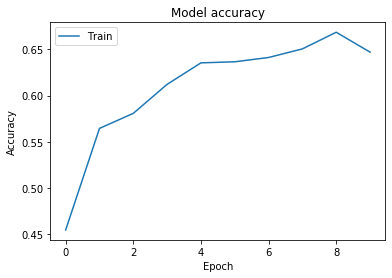

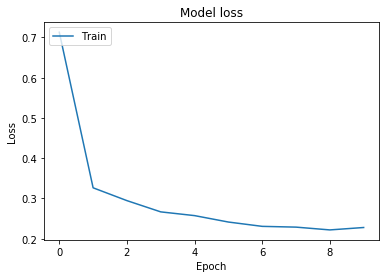

In [23]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


### Validation:

In [24]:
loss, mean_absolute_error, accuracy =model1.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.2104390954429453   mean_absolute_error: 0.42969244718551636   accuracy: 0.6969696879386902


__For the baseline model, Loss is Higher and Accuracy on validation data is 63%__

# Activation function

___Hyperparameters:___<br>
filters=128<br>
kernel_size=3<br>
Activation functions=  elu, softmax<br>
loss=mean_squared_error<br>
optimizer= adam<br>

In [25]:
# define model
model2 = Sequential()

model2.add(Conv1D(filters=128, kernel_size=3, activation='elu', input_shape=(n_steps, n_features)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dropout(0.25))
model2.add(Dense(20, activation='softmax'))
model2.add(Dropout(0.25))
model2.add(Dense(1))


In [26]:
adam=optimizers.Adam(learning_rate=0.4, beta_1=0.9, beta_2=0.999, amsgrad=False)
model2.compile(optimizer='adam', loss='mean_squared_error',metrics=[metrics.mae, 'accuracy'])
history=model2.fit(X1, y1, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
 - 0s - loss: 0.3031 - mean_absolute_error: 0.4801 - accuracy: 0.5564
Epoch 2/10
 - 0s - loss: 0.2518 - mean_absolute_error: 0.4515 - accuracy: 0.6116
Epoch 3/10
 - 0s - loss: 0.2470 - mean_absolute_error: 0.4406 - accuracy: 0.6221
Epoch 4/10
 - 0s - loss: 0.2340 - mean_absolute_error: 0.4341 - accuracy: 0.6331
Epoch 5/10
 - 0s - loss: 0.2293 - mean_absolute_error: 0.4309 - accuracy: 0.6355
Epoch 6/10
 - 0s - loss: 0.2236 - mean_absolute_error: 0.4220 - accuracy: 0.6477
Epoch 7/10
 - 0s - loss: 0.2238 - mean_absolute_error: 0.4294 - accuracy: 0.6529
Epoch 8/10
 - 0s - loss: 0.2196 - mean_absolute_error: 0.4231 - accuracy: 0.6552
Epoch 9/10
 - 0s - loss: 0.2163 - mean_absolute_error: 0.4166 - accuracy: 0.6634
Epoch 10/10
 - 0s - loss: 0.2103 - mean_absolute_error: 0.4116 - accuracy: 0.6907


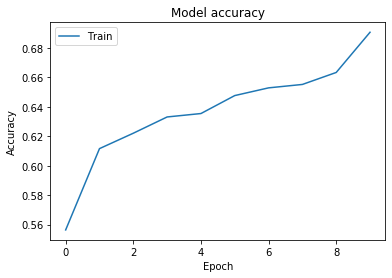

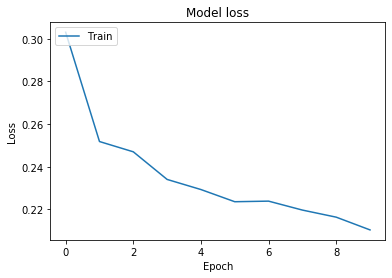

In [27]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


### Validation:

In [63]:
loss, mean_absolute_error, accuracy =model2.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.2764722759073431   mean_absolute_error: 0.523048996925354   accuracy: 0.3030303120613098


__After changing the activation functions in the current network, loss get reduced but with decrease in accuracy on validation set which is 30%.__  

# Cost function / loss

___Hyperparameters:___<br>
filters=128<br>
kernel_size=3<br>
Activation functions=  elu, softmax<br>
loss= hinge, logcosh<br>
optimizer= adam<br>

__1. Cost function= hinge:__

In [28]:
model2.compile(optimizer='adam', loss='hinge',metrics=[metrics.mae, 'accuracy'])
history=model2.fit(X1, y1, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
 - 0s - loss: 0.8280 - mean_absolute_error: 0.3903 - accuracy: 0.6785
Epoch 2/10
 - 0s - loss: 0.7772 - mean_absolute_error: 0.4316 - accuracy: 0.6779
Epoch 3/10
 - 0s - loss: 0.7588 - mean_absolute_error: 0.5018 - accuracy: 0.6605
Epoch 4/10
 - 0s - loss: 0.7559 - mean_absolute_error: 0.5383 - accuracy: 0.5471
Epoch 5/10
 - 0s - loss: 0.7499 - mean_absolute_error: 0.5934 - accuracy: 0.4378
Epoch 6/10
 - 0s - loss: 0.7184 - mean_absolute_error: 0.6502 - accuracy: 0.3791
Epoch 7/10
 - 0s - loss: 0.6962 - mean_absolute_error: 0.7026 - accuracy: 0.3599
Epoch 8/10
 - 0s - loss: 0.6672 - mean_absolute_error: 0.7386 - accuracy: 0.3744
Epoch 9/10
 - 0s - loss: 0.6864 - mean_absolute_error: 0.7716 - accuracy: 0.3860
Epoch 10/10
 - 0s - loss: 0.6948 - mean_absolute_error: 0.7789 - accuracy: 0.3727


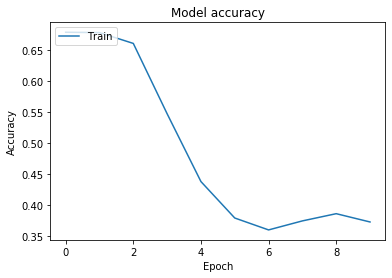

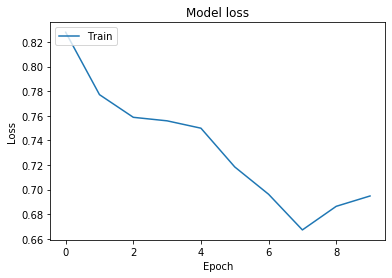

In [29]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


__Accuracy :__

In [24]:
loss, mean_absolute_error, accuracy =model2.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.6813373999162153   mean_absolute_error: 0.3783071041107178   accuracy: 0.6969696879386902


__2. Cost function= logcosh:__

In [30]:
model2.compile(optimizer='adam', loss='logcosh',metrics=[metrics.mae, 'accuracy'])
history=model2.fit(X1, y1, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
 - 0s - loss: 0.2246 - mean_absolute_error: 0.5722 - accuracy: 0.5023
Epoch 2/10
 - 0s - loss: 0.1104 - mean_absolute_error: 0.4184 - accuracy: 0.6401
Epoch 3/10
 - 0s - loss: 0.1074 - mean_absolute_error: 0.4146 - accuracy: 0.6419
Epoch 4/10
 - 0s - loss: 0.1061 - mean_absolute_error: 0.4171 - accuracy: 0.6535
Epoch 5/10
 - 0s - loss: 0.1049 - mean_absolute_error: 0.4132 - accuracy: 0.6610
Epoch 6/10
 - 0s - loss: 0.1005 - mean_absolute_error: 0.4059 - accuracy: 0.6762
Epoch 7/10
 - 0s - loss: 0.1020 - mean_absolute_error: 0.4086 - accuracy: 0.6750
Epoch 8/10
 - 0s - loss: 0.1022 - mean_absolute_error: 0.4060 - accuracy: 0.6680
Epoch 9/10
 - 0s - loss: 0.1025 - mean_absolute_error: 0.4150 - accuracy: 0.6680
Epoch 10/10
 - 0s - loss: 0.0997 - mean_absolute_error: 0.4058 - accuracy: 0.6849


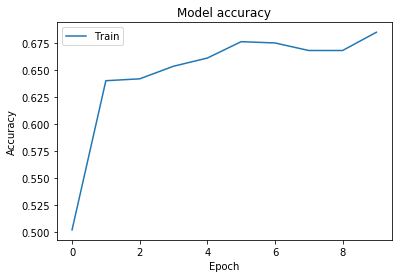

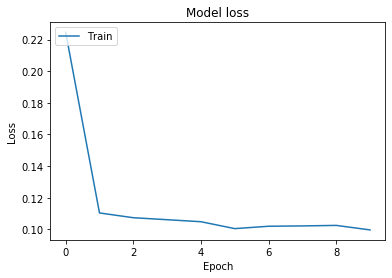

In [31]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


__Accuracy :__

In [32]:
loss, mean_absolute_error, accuracy =model2.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.10073961633624452   mean_absolute_error: 0.43285611271858215   accuracy: 0.6969696879386902


__For the cost function, logcosh is better than hinge for better accuracy.__ 

# Epochs

___Hyperparameters:___<br>
filters=128<br>
kernel_size=3<br>
Activation functions=  elu, softmax<br>
loss= logcosh<br>
optimizer= adam<br>
epochs=200 <br>

In [33]:
model2.compile(optimizer='adam', loss='logcosh',metrics=[metrics.mae, 'accuracy'])
history=model2.fit(X1, y1, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
 - 0s - loss: 0.0999 - mean_absolute_error: 0.4039 - accuracy: 0.6767
Epoch 2/200
 - 0s - loss: 0.1023 - mean_absolute_error: 0.4106 - accuracy: 0.6634
Epoch 3/200
 - 0s - loss: 0.0962 - mean_absolute_error: 0.3995 - accuracy: 0.6953
Epoch 4/200
 - 0s - loss: 0.0974 - mean_absolute_error: 0.3998 - accuracy: 0.6773
Epoch 5/200
 - 0s - loss: 0.0959 - mean_absolute_error: 0.3987 - accuracy: 0.6959
Epoch 6/200
 - 0s - loss: 0.0977 - mean_absolute_error: 0.4032 - accuracy: 0.6924
Epoch 7/200
 - 0s - loss: 0.0962 - mean_absolute_error: 0.3974 - accuracy: 0.6971
Epoch 8/200
 - 0s - loss: 0.0941 - mean_absolute_error: 0.3946 - accuracy: 0.7029
Epoch 9/200
 - 0s - loss: 0.0956 - mean_absolute_error: 0.3896 - accuracy: 0.6959
Epoch 10/200
 - 0s - loss: 0.0956 - mean_absolute_error: 0.3949 - accuracy: 0.6942
Epoch 11/200
 - 0s - loss: 0.0961 - mean_absolute_error: 0.3964 - accuracy: 0.7012
Epoch 12/200
 - 0s - loss: 0.0953 - mean_absolute_error: 0.3893 - accuracy: 0.6965
Epoch 13/200


Epoch 100/200
 - 0s - loss: 0.0899 - mean_absolute_error: 0.3750 - accuracy: 0.7163
Epoch 101/200
 - 0s - loss: 0.0890 - mean_absolute_error: 0.3724 - accuracy: 0.7203
Epoch 102/200
 - 0s - loss: 0.0910 - mean_absolute_error: 0.3784 - accuracy: 0.7192
Epoch 103/200
 - 0s - loss: 0.0909 - mean_absolute_error: 0.3805 - accuracy: 0.7186
Epoch 104/200
 - 0s - loss: 0.0907 - mean_absolute_error: 0.3801 - accuracy: 0.7169
Epoch 105/200
 - 0s - loss: 0.0890 - mean_absolute_error: 0.3716 - accuracy: 0.7238
Epoch 106/200
 - 0s - loss: 0.0886 - mean_absolute_error: 0.3696 - accuracy: 0.7203
Epoch 107/200
 - 0s - loss: 0.0900 - mean_absolute_error: 0.3767 - accuracy: 0.7145
Epoch 108/200
 - 0s - loss: 0.0915 - mean_absolute_error: 0.3812 - accuracy: 0.7070
Epoch 109/200
 - 0s - loss: 0.0890 - mean_absolute_error: 0.3769 - accuracy: 0.7198
Epoch 110/200
 - 0s - loss: 0.0886 - mean_absolute_error: 0.3701 - accuracy: 0.7227
Epoch 111/200
 - 0s - loss: 0.0908 - mean_absolute_error: 0.3804 - accuracy:

Epoch 198/200
 - 0s - loss: 0.0884 - mean_absolute_error: 0.3700 - accuracy: 0.7198
Epoch 199/200
 - 0s - loss: 0.0881 - mean_absolute_error: 0.3721 - accuracy: 0.7203
Epoch 200/200
 - 0s - loss: 0.0892 - mean_absolute_error: 0.3731 - accuracy: 0.7215


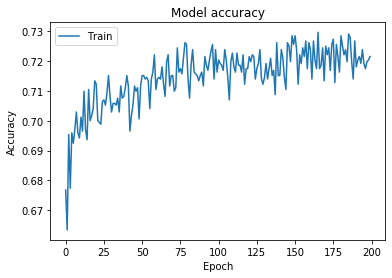

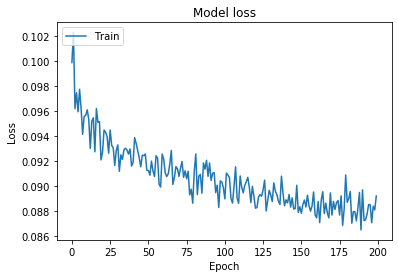

In [34]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


__Accuracy :__

In [28]:
loss, mean_absolute_error, accuracy =model2.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.11469146699616403   mean_absolute_error: 0.47265517711639404   accuracy: 0.6666666865348816


__After increasing number of epochs in the model, accuracy increased and loss decreased.__

# Gradient estimation

___Hyperparameters:___<br>
filters=128<br>
kernel_size=3<br>
Activation functions=  elu, softmax<br>
loss= logcosh<br>
optimizer= RMSprop, Adagrad<br>
epochs=200 <br>

__1. optimizers : RMSprop__

In [35]:
RMSprop=optimizers.RMSprop(learning_rate=0.4, rho=0.9)
model2.compile(optimizer='RMSprop', loss='logcosh',metrics=[metrics.mae, 'accuracy'])
history=model2.fit(X1, y1, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
 - 0s - loss: 0.0897 - mean_absolute_error: 0.3732 - accuracy: 0.7192
Epoch 2/200
 - 0s - loss: 0.0894 - mean_absolute_error: 0.3693 - accuracy: 0.7209
Epoch 3/200
 - 0s - loss: 0.0882 - mean_absolute_error: 0.3701 - accuracy: 0.7221
Epoch 4/200
 - 0s - loss: 0.0878 - mean_absolute_error: 0.3638 - accuracy: 0.7198
Epoch 5/200
 - 0s - loss: 0.0871 - mean_absolute_error: 0.3655 - accuracy: 0.7244
Epoch 6/200
 - 0s - loss: 0.0869 - mean_absolute_error: 0.3635 - accuracy: 0.7302
Epoch 7/200
 - 0s - loss: 0.0867 - mean_absolute_error: 0.3619 - accuracy: 0.7221
Epoch 8/200
 - 0s - loss: 0.0868 - mean_absolute_error: 0.3616 - accuracy: 0.7227
Epoch 9/200
 - 0s - loss: 0.0889 - mean_absolute_error: 0.3717 - accuracy: 0.7203
Epoch 10/200
 - 0s - loss: 0.0886 - mean_absolute_error: 0.3684 - accuracy: 0.7186
Epoch 11/200
 - 0s - loss: 0.0890 - mean_absolute_error: 0.3689 - accuracy: 0.7163
Epoch 12/200
 - 0s - loss: 0.0883 - mean_absolute_error: 0.3659 - accuracy: 0.7151
Epoch 13/200


Epoch 100/200
 - 0s - loss: 0.0879 - mean_absolute_error: 0.3620 - accuracy: 0.7267
Epoch 101/200
 - 0s - loss: 0.0862 - mean_absolute_error: 0.3635 - accuracy: 0.7337
Epoch 102/200
 - 0s - loss: 0.0873 - mean_absolute_error: 0.3635 - accuracy: 0.7256
Epoch 103/200
 - 0s - loss: 0.0878 - mean_absolute_error: 0.3634 - accuracy: 0.7267
Epoch 104/200
 - 0s - loss: 0.0871 - mean_absolute_error: 0.3605 - accuracy: 0.7233
Epoch 105/200
 - 0s - loss: 0.0856 - mean_absolute_error: 0.3615 - accuracy: 0.7331
Epoch 106/200
 - 0s - loss: 0.0858 - mean_absolute_error: 0.3575 - accuracy: 0.7262
Epoch 107/200
 - 0s - loss: 0.0864 - mean_absolute_error: 0.3612 - accuracy: 0.7267
Epoch 108/200
 - 0s - loss: 0.0860 - mean_absolute_error: 0.3595 - accuracy: 0.7291
Epoch 109/200
 - 0s - loss: 0.0871 - mean_absolute_error: 0.3612 - accuracy: 0.7302
Epoch 110/200
 - 0s - loss: 0.0865 - mean_absolute_error: 0.3569 - accuracy: 0.7267
Epoch 111/200
 - 0s - loss: 0.0890 - mean_absolute_error: 0.3654 - accuracy:

Epoch 198/200
 - 0s - loss: 0.0853 - mean_absolute_error: 0.3542 - accuracy: 0.7343
Epoch 199/200
 - 0s - loss: 0.0876 - mean_absolute_error: 0.3635 - accuracy: 0.7250
Epoch 200/200
 - 0s - loss: 0.0861 - mean_absolute_error: 0.3556 - accuracy: 0.7308


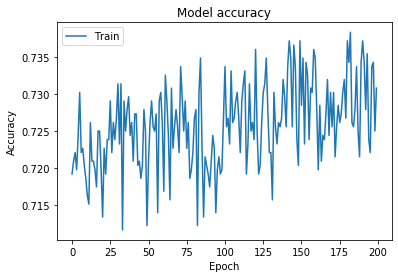

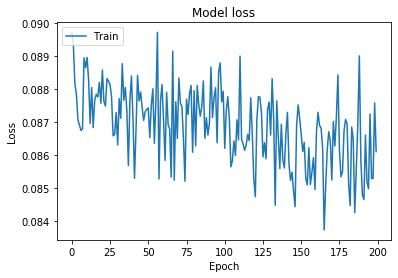

In [36]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


__Accuracy :__

In [30]:
loss, mean_absolute_error, accuracy =model2.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.10839736822879675   mean_absolute_error: 0.45831698179244995   accuracy: 0.6969696879386902


__2. optimizers : Adagrad__

In [37]:
Adagrad=optimizers.Adagrad(learning_rate=0.001)
model2.compile(optimizer='Adagrad', loss='logcosh',metrics=[metrics.mae, 'accuracy'])
model2.fit(X1, y1, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
 - 0s - loss: 0.0898 - mean_absolute_error: 0.3746 - accuracy: 0.7157
Epoch 2/200
 - 0s - loss: 0.0906 - mean_absolute_error: 0.3756 - accuracy: 0.7029
Epoch 3/200
 - 0s - loss: 0.0892 - mean_absolute_error: 0.3695 - accuracy: 0.7221
Epoch 4/200
 - 0s - loss: 0.0868 - mean_absolute_error: 0.3657 - accuracy: 0.7250
Epoch 5/200
 - 0s - loss: 0.0890 - mean_absolute_error: 0.3708 - accuracy: 0.7198
Epoch 6/200
 - 0s - loss: 0.0850 - mean_absolute_error: 0.3605 - accuracy: 0.7273
Epoch 7/200
 - 0s - loss: 0.0853 - mean_absolute_error: 0.3589 - accuracy: 0.7308
Epoch 8/200
 - 0s - loss: 0.0861 - mean_absolute_error: 0.3641 - accuracy: 0.7320
Epoch 9/200
 - 0s - loss: 0.0874 - mean_absolute_error: 0.3645 - accuracy: 0.7267
Epoch 10/200
 - 0s - loss: 0.0871 - mean_absolute_error: 0.3646 - accuracy: 0.7279
Epoch 11/200
 - 0s - loss: 0.0859 - mean_absolute_error: 0.3616 - accuracy: 0.7308
Epoch 12/200
 - 0s - loss: 0.0861 - mean_absolute_error: 0.3634 - accuracy: 0.7302
Epoch 13/200


Epoch 100/200
 - 0s - loss: 0.0834 - mean_absolute_error: 0.3522 - accuracy: 0.7436
Epoch 101/200
 - 0s - loss: 0.0827 - mean_absolute_error: 0.3520 - accuracy: 0.7390
Epoch 102/200
 - 0s - loss: 0.0829 - mean_absolute_error: 0.3506 - accuracy: 0.7326
Epoch 103/200
 - 0s - loss: 0.0838 - mean_absolute_error: 0.3522 - accuracy: 0.7349
Epoch 104/200
 - 0s - loss: 0.0818 - mean_absolute_error: 0.3477 - accuracy: 0.7384
Epoch 105/200
 - 0s - loss: 0.0831 - mean_absolute_error: 0.3499 - accuracy: 0.7413
Epoch 106/200
 - 0s - loss: 0.0823 - mean_absolute_error: 0.3493 - accuracy: 0.7390
Epoch 107/200
 - 0s - loss: 0.0820 - mean_absolute_error: 0.3493 - accuracy: 0.7343
Epoch 108/200
 - 0s - loss: 0.0829 - mean_absolute_error: 0.3495 - accuracy: 0.7384
Epoch 109/200
 - 0s - loss: 0.0844 - mean_absolute_error: 0.3534 - accuracy: 0.7314
Epoch 110/200
 - 0s - loss: 0.0825 - mean_absolute_error: 0.3498 - accuracy: 0.7314
Epoch 111/200
 - 0s - loss: 0.0815 - mean_absolute_error: 0.3478 - accuracy:

Epoch 198/200
 - 0s - loss: 0.0832 - mean_absolute_error: 0.3513 - accuracy: 0.7302
Epoch 199/200
 - 0s - loss: 0.0827 - mean_absolute_error: 0.3504 - accuracy: 0.7320
Epoch 200/200
 - 0s - loss: 0.0828 - mean_absolute_error: 0.3502 - accuracy: 0.7395


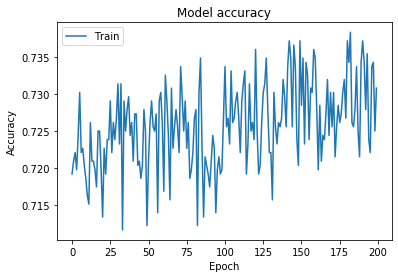

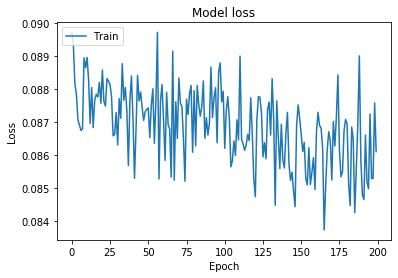

In [38]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [32]:
loss, mean_absolute_error, accuracy =model2.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.10720591111616655   mean_absolute_error: 0.462567538022995   accuracy: 0.6969696879386902


__Optimizer: Adagrad is better suit for this model than RMSprop. Although, both are close enough in terms of accuracy and loss.__ 

# Network Architecture

___Hyperparameters:___<br>
filters=256<br>
kernel_size=2<br>
Activation functions=  relu, elu, softmax<br>
loss=logcosh<br>
optimizer= adagrad<br>
epoch=100<br>

In [40]:
# define model
model3 = Sequential()

model3.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
model3.add(MaxPooling1D(pool_size=2))
model3.add(BatchNormalization())

model3.add(Dense(128, activation='elu'))
model3.add(Dropout(0.25))

model3.add(Conv1D(filters=128, kernel_size=2, activation='elu'))
model3.add(MaxPooling1D(pool_size=2))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

model3.add(Dense(64))
model3.add(Dropout(0.25))


model3.add(Flatten())

model3.add(Dropout(0.25))
model3.add(Dense(20, activation='softmax'))
model3.add(Dropout(0.25))
model3.add(Dense(1))


In [41]:
Adagrad=optimizers.Adagrad(learning_rate=0.4)
model3.compile(optimizer='Adagrad', loss='logcosh',metrics=[metrics.mae, 'accuracy'])
history=model3.fit(X1, y1, batch_size=32, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 0.1362 - mean_absolute_error: 0.4792 - accuracy: 0.5802
Epoch 2/100
 - 0s - loss: 0.1251 - mean_absolute_error: 0.4585 - accuracy: 0.6192
Epoch 3/100
 - 0s - loss: 0.1205 - mean_absolute_error: 0.4505 - accuracy: 0.6250
Epoch 4/100
 - 0s - loss: 0.1157 - mean_absolute_error: 0.4411 - accuracy: 0.6273
Epoch 5/100
 - 0s - loss: 0.1116 - mean_absolute_error: 0.4265 - accuracy: 0.6465
Epoch 6/100
 - 0s - loss: 0.1092 - mean_absolute_error: 0.4188 - accuracy: 0.6541
Epoch 7/100
 - 0s - loss: 0.1124 - mean_absolute_error: 0.4294 - accuracy: 0.6413
Epoch 8/100
 - 0s - loss: 0.1117 - mean_absolute_error: 0.4319 - accuracy: 0.6349
Epoch 9/100
 - 0s - loss: 0.1092 - mean_absolute_error: 0.4240 - accuracy: 0.6401
Epoch 10/100
 - 0s - loss: 0.1126 - mean_absolute_error: 0.4282 - accuracy: 0.6291
Epoch 11/100
 - 0s - loss: 0.1059 - mean_absolute_error: 0.4152 - accuracy: 0.6576
Epoch 12/100
 - 0s - loss: 0.1081 - mean_absolute_error: 0.4142 - accuracy: 0.6483
Epoch 13/100


Epoch 100/100
 - 0s - loss: 0.0955 - mean_absolute_error: 0.3990 - accuracy: 0.7035


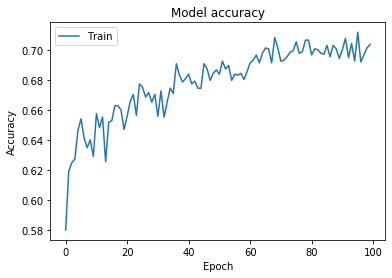

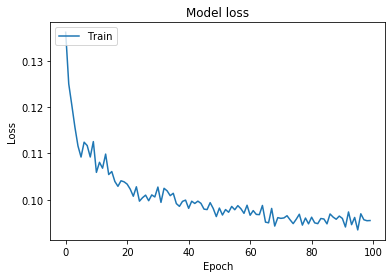

In [42]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [59]:
loss, mean_absolute_error, accuracy =model3.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.09973003647544167   mean_absolute_error: 0.4202899932861328   accuracy: 0.6969696879386902


__After changing the number of layers and the size of the layers, both accuracy and loss got improve.__

# Network initialization

___Hyperparameters:___<br>
filters=256<br>
kernel_size=3,2<br>
Activation functions= relu, elu, softmax<br>
kernel_initializer=Ones, RandomNormal <br>
loss=mean_squared_error<br>
optimizer= adam<br>

In [43]:
# define model
# Default : kernel_initializer='glorot_uniform'

model4 = Sequential()

model4.add(Conv1D(filters=256, kernel_size=3, activation='relu', kernel_initializer='Ones' , input_shape=(n_steps, n_features)))
model4.add(MaxPooling1D(pool_size=2))
model4.add(BatchNormalization())


model4.add(Conv1D(filters=128, kernel_size=2, activation='elu',kernel_initializer='RandomNormal'))
model4.add(MaxPooling1D(pool_size=2))
model4.add(BatchNormalization())
model4.add(Dropout(0.25))


model4.add(Flatten())

model4.add(Dropout(0.25))
model4.add(Dense(20, activation='softmax'))
model4.add(Dropout(0.25))
model4.add(Dense(1))


In [44]:
Adagrad=optimizers.Adagrad(learning_rate=0.01)
model4.compile(optimizer='Adagrad', loss='logcosh',metrics=[metrics.mae, 'accuracy'])
history=model4.fit(X1, y1, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
 - 1s - loss: 0.1322 - mean_absolute_error: 0.4732 - accuracy: 0.5826
Epoch 2/200
 - 0s - loss: 0.1175 - mean_absolute_error: 0.4545 - accuracy: 0.6122
Epoch 3/200
 - 0s - loss: 0.1136 - mean_absolute_error: 0.4429 - accuracy: 0.6227
Epoch 4/200
 - 0s - loss: 0.1130 - mean_absolute_error: 0.4416 - accuracy: 0.6285
Epoch 5/200
 - 0s - loss: 0.1093 - mean_absolute_error: 0.4321 - accuracy: 0.6436
Epoch 6/200
 - 0s - loss: 0.1131 - mean_absolute_error: 0.4369 - accuracy: 0.6291
Epoch 7/200
 - 0s - loss: 0.1115 - mean_absolute_error: 0.4332 - accuracy: 0.6337
Epoch 8/200
 - 0s - loss: 0.1065 - mean_absolute_error: 0.4215 - accuracy: 0.6558
Epoch 9/200
 - 0s - loss: 0.1138 - mean_absolute_error: 0.4393 - accuracy: 0.6250
Epoch 10/200
 - 0s - loss: 0.1084 - mean_absolute_error: 0.4250 - accuracy: 0.6494
Epoch 11/200
 - 0s - loss: 0.1106 - mean_absolute_error: 0.4329 - accuracy: 0.6430
Epoch 12/200
 - 0s - loss: 0.1090 - mean_absolute_error: 0.4283 - accuracy: 0.6384
Epoch 13/200


Epoch 100/200
 - 0s - loss: 0.1008 - mean_absolute_error: 0.4208 - accuracy: 0.6762
Epoch 101/200
 - 0s - loss: 0.0994 - mean_absolute_error: 0.4159 - accuracy: 0.6785
Epoch 102/200
 - 0s - loss: 0.1005 - mean_absolute_error: 0.4174 - accuracy: 0.6773
Epoch 103/200
 - 0s - loss: 0.0986 - mean_absolute_error: 0.4126 - accuracy: 0.6767
Epoch 104/200
 - 0s - loss: 0.0995 - mean_absolute_error: 0.4150 - accuracy: 0.6814
Epoch 105/200
 - 0s - loss: 0.0990 - mean_absolute_error: 0.4107 - accuracy: 0.6785
Epoch 106/200
 - 0s - loss: 0.0987 - mean_absolute_error: 0.4130 - accuracy: 0.6843
Epoch 107/200
 - 0s - loss: 0.0997 - mean_absolute_error: 0.4153 - accuracy: 0.6802
Epoch 108/200
 - 0s - loss: 0.1000 - mean_absolute_error: 0.4134 - accuracy: 0.6727
Epoch 109/200
 - 0s - loss: 0.0994 - mean_absolute_error: 0.4127 - accuracy: 0.6802
Epoch 110/200
 - 0s - loss: 0.0994 - mean_absolute_error: 0.4138 - accuracy: 0.6727
Epoch 111/200
 - 0s - loss: 0.0989 - mean_absolute_error: 0.4125 - accuracy:

Epoch 198/200
 - 0s - loss: 0.0982 - mean_absolute_error: 0.4091 - accuracy: 0.6808
Epoch 199/200
 - 0s - loss: 0.0982 - mean_absolute_error: 0.4086 - accuracy: 0.6791
Epoch 200/200
 - 0s - loss: 0.0982 - mean_absolute_error: 0.4084 - accuracy: 0.6849


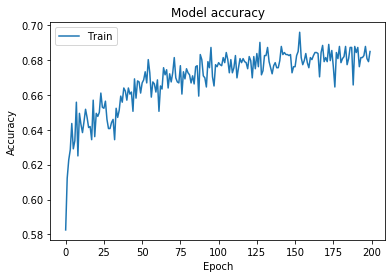

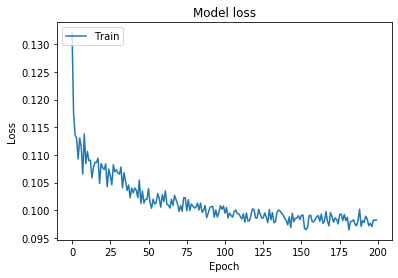

In [45]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()


In [46]:
loss, mean_absolute_error, accuracy =model4.evaluate(X2, y2, batch_size=32, verbose=2)
print('Accuracy on Test Data :- ')
print('\t loss:',loss , '  mean_absolute_error:',mean_absolute_error, '  accuracy:',accuracy)

Accuracy on Test Data :- 
	 loss: 0.10043254404356985   mean_absolute_error: 0.43014082312583923   accuracy: 0.6969696879386902


__After changing the kernel initialization, accuracy on validation set got increase.__

# Conclusion:
After performing analysis on the CNN model, it is observed that, <br>
>1. For the baseline model, Loss is Higher and Accuracy on validation data is 63%.<br> 
>2. The cost function logcosh is appropriate for this model than hinge.<br> 
>3. Higher the number of epochs, better the model is.<br>
>4. Change in Optimizer can increase the accuracy and it helps to reduce the loss. Adagrad is better suit for this type of model than RMSprop<br>
>5. Network architecture is as important as hyperparameters. By adding more layers and with proper use of hyperparamters, we can achieve higher accuracy.<br>
>6. After changing the kernel initialization, accuracy on validation set got increase.

For Multivariate Tabular data, Convolution Neural Network can produce good results but handling of data For the CNN model is difficult. 

# Author: 
Pranav Khiste<br>
Information Systems <br>
Northeastern University <br>

# Citation:
References: <br>
https://keras.io/models<br>
https://machinelearningmastery.com/ <br>
https://karpathy.github.io/2019/04/25/recipe<br>

# Licensing

Copyright 2020 Pranav Sanjay Khiste

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.